/home/arratialab2/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


114
-14.996937797814045
1.9397690696019936
10.064443927125506
curve fit didn't converge to good values
118
-15.594408288893511
0.22934874018757512
9.535098178137652
curve fit didn't converge to good values
119
-17.77416615162801
-1.6512872455848253
9.511808502024293
curve fit didn't converge to good values
156
-14.66444598234382
0.4537472992760456
10.220257287449401
curve fit didn't converge to good values


KeyboardInterrupt: 

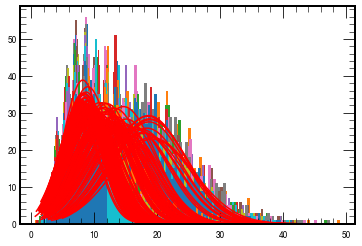

In [1]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
from matplotlib import colors
import mplhep as hep
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
hep.style.use(hep.style.CMS)
#hep.set_style("CMS")
PEconversion = 1.58
filenumber = 1681
#961
avgp2p = []

with open("Jun22Scan.txt") as f:
    points = (f.read().split('Point'))
i = 0
for point in points:                             #iterate through files
    
    i = i+1
    peaktopeak = []
    p2ps = point.split('\n')
    for p2p in p2ps:
        try:
            peaktopeak.append(float(p2p))
        except (ValueError) as Error:
            x=1
    if len(peaktopeak) > 0:
        hist_data, bins, patches = plt.hist(peaktopeak, 100, range=[min(peaktopeak), max(peaktopeak)])
        x = np.linspace(min(peaktopeak), max(peaktopeak), 100)
        y = hist_data
        perr = [1000, 1000, 1000]
        popt = [0, 0, 0]
        
        try:
            popt, pcov = curve_fit(gaussian, x, y, p0=(60, sum(peaktopeak)/len(peaktopeak), 50));
            perr = np.sqrt(np.diag(pcov))
        except (ValueError, RuntimeError) as error:
            print(i)
            print("curve fit didn't converge")
            x=1
       
        #avgp2p.append(sum(peaktopeak)/len(peaktopeak))  
        if(perr[1] < 3 and perr[2] < 3):
            avgp2p.append(popt[1]/PEconversion) 
            y = gaussian(x, *popt)
            plt.plot(x, y, color='r')
        else:
            avgp2p.append(0) 
            print(i)
            print(popt[1])
            print(popt[2])
            print(sum(peaktopeak)/len(peaktopeak))
            print("curve fit didn't converge to good values")
            

    else:
        avgp2p.append(0) 
#For square heatmap

rows = int(filenumber / np.sqrt(filenumber))
columns = int(filenumber / np.sqrt(filenumber))
heatmap = [0]*rows

k = 1
for i in range(0, rows):                                   #make 2d array of averages
    column = []
    for j in range(0, columns):
        column.append(avgp2p[k])
        k += 1
    heatmap[i] = column
print(heatmap)

<function matplotlib.pyplot.show(close=None, block=None)>

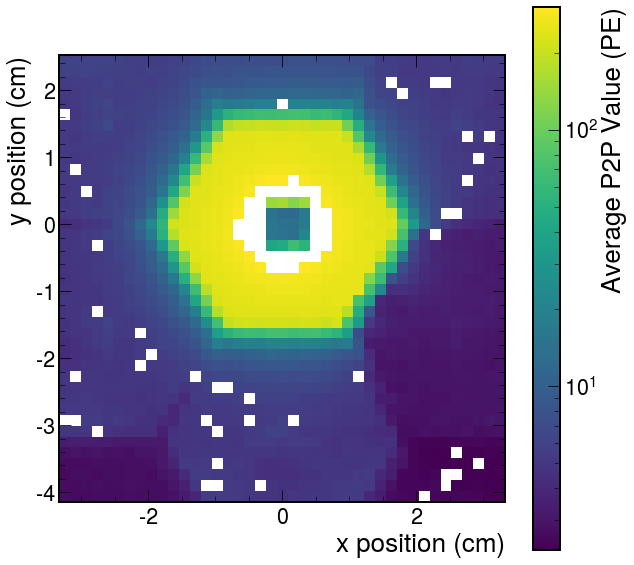

In [6]:
hep.style.use(hep.style.CMS)
center1 = 0
center2 = 0.8125
width = 6.5
step = 0.1625
rad = width/2
lbound1 = rad - center1 + (step/2)
rbound1 = -rad - center1 - (step/2)

lbound2 = rad - center2 + (step/2)
rbound2 = -rad - center2 - (step/2)


plt.imshow(heatmap, cmap='viridis',norm=colors.LogNorm(), extent=[rbound1,lbound1,rbound2,lbound2])
#plt.imshow(heatmap, cmap='viridis',vmin=0, extent=[rbound1,lbound1,rbound2,lbound2])
hep.style.use(hep.style.CMS)
hep.set_style("CMS")
plt.xlabel("x position (cm)")
plt.ylabel("y position (cm)")
cbar = plt.colorbar()
cbar.set_label("Average P2P Value (PE)")
plt.show

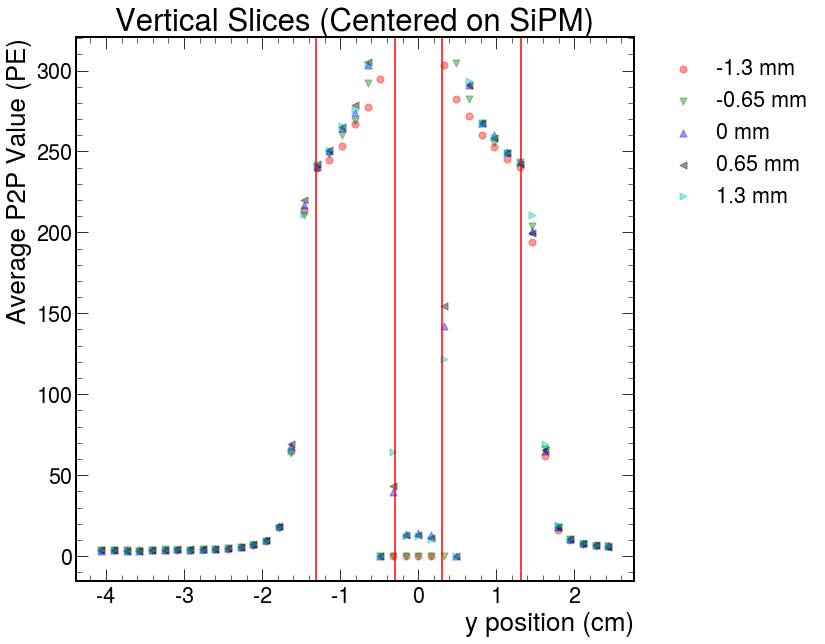

In [17]:
center = 0.8125
width = 6.5
rad = width/2
lbound = rad - center
rbound = -rad - center

maxValue = 0
for i in range(5):
    for value in heatmap:
        if value[13+i] > maxValue:
            maxValue = value[16+i]
fig = plt.figure()
ax = plt.subplot(111)

        
col = 18        
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound,41),linevalues,s=50,color='r',label='-1.3 mm',alpha=0.4)

col = col+1              
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 41),linevalues,s=50,color='g',label='-0.65 mm',alpha=0.4,marker='v')

col = col+1              
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 41),linevalues,s=50,color='b',label='0 mm',alpha=0.4,marker='^')

col = col+1             
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 41),linevalues,s=50,color='k',label='0.65 mm',alpha=0.4,marker='<')

col = col+1           
linevalues = []
for value in heatmap:
    linevalues.append(value[col])
ax.scatter(np.linspace(lbound,rbound, 41),linevalues,s=50,color='c',label='1.3 mm',alpha=0.4,marker='>')



ax.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
        
plt.xlabel("y position (cm)")
plt.ylabel("Average P2P Value (PE)")
plt.title("Vertical Slices (Centered on SiPM)")
plt.axvline(1.316,color='red',label='Hexagon top boundary')
plt.axvline(-1.316,color='red',label='Hexagon bottom boundary')
plt.axvline(-0.3,color='red',label='SiPM top boundary')
plt.axvline(0.3,color='red',label='SiPM bottom boundary')

#plt.axvline(0,color='red',label='SiPM bottom boundary')
#plt.axvline(-3.0393,color='red',label='SiPM bottom boundary')

plt.show()

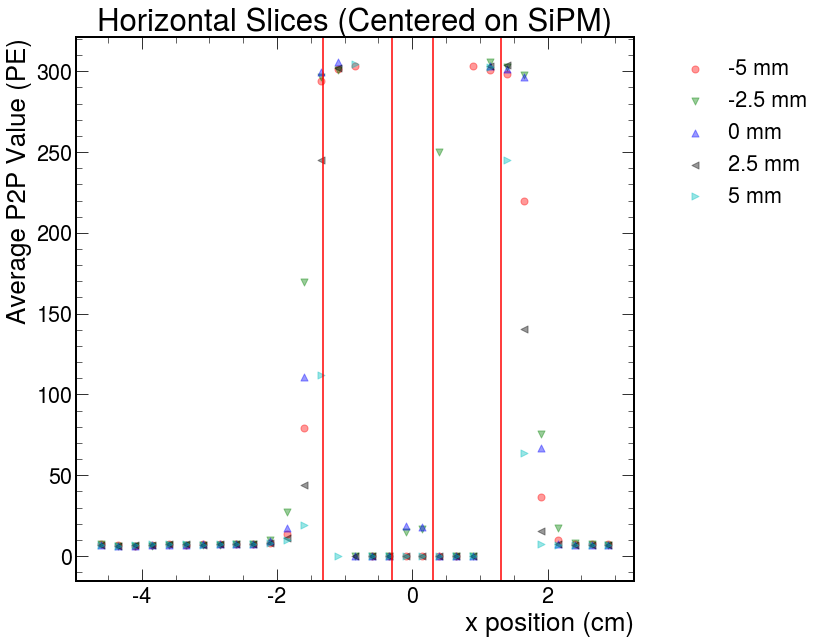

In [8]:
center = 0
width = 6.5
rad = width/2
lbound = -rad - center
rbound = rad - center


maxValue = 0
for i in range(5):
    for value in heatmap[13+i]:
        if value > maxValue:
            maxValue = value
fig = plt.figure()
ax = plt.subplot(111)

        
col = 9               
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='r',label='-5 mm',alpha=0.4)

col = col+1              
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='g',label='-2.5 mm',alpha=0.4,marker='v')

col = col+1             
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='b',label='0 mm',alpha=0.4,marker='^')

col = col+1               
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='k',label='2.5 mm',alpha=0.4,marker='<')

col = col+1             
linevalues = []
for value in heatmap[col]:
    linevalues.append(value)
ax.scatter(np.linspace(lbound,rbound, 31),linevalues,s=50,color='c',label='5 mm',alpha=0.4,marker='>')


ax.legend(loc='upper right',bbox_to_anchor=(1.35, 1))
        
plt.xlabel("x position (cm)")
plt.ylabel("Average P2P Value (PE)")
plt.title("Horizontal Slices (Centered on SiPM)")
plt.axvline(1.316,color='red',label='Hexagon top boundary')
plt.axvline(-1.316 ,color='red',label='Hexagon bottom boundary')
plt.axvline(-0.3 ,color='red',label='SiPM top boundary')
plt.axvline(0.3 ,color='red',label='SiPPM bottom boundary')

plt.show()